In [1]:
import hsa
import numpy as np
import xarray as xr
import xarray.ufuncs as xu
from dask.diagnostics import ProgressBar
import scipy.stats as ss
import paths as ps
from datetime import datetime, timedelta
import bottleneck
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lons = np.arange(180,310.1,0.5)
lats = np.arange(20,80.1,0.5)
nfa = hsa.NewForecastArray('mean','slp',24)
gefs = nfa.load_forecast(subset_lat=lats,subset_lon=lons)


Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_024.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/tay

In [3]:
variable = 'slp'
with open(ps.log_directory + 'current_run.txt', "r") as f:
    model_date=datetime.strptime(f.readlines()[-1][5:13],'%Y%m%d')
mc = hsa.MClimate(model_date, variable, 24, percentage=10)

In [4]:
def xarr_interpolate(original, new, on='latlon'):
    if on == 'latlon':
        new_lat = [i for i in new.coords if 'lat' in i][0]
        new_lon = [i for i in new.coords if 'lon' in i][0]
        old_lat = [i for i in original.coords if 'lat' in i][0]
        old_lon = [i for i in original.coords if 'lon' in i][0]
        original_i = original.interp({old_lat : new[new_lat].values}).interp({old_lon : new[new_lon].values})
        return original_i
    else:
        raise Exception('latlon interpolation only works as of now...')

In [29]:
mc_mu = xarr_interpolate(mc.generate(type='mean',dask=True),gefs)

In [30]:
mc_mu

<xarray.Dataset>
Dimensions:   (lat: 121, lon: 261, time: 630)
Coordinates:
    fhour     timedelta64[ns] 1 days
  * time      (time) datetime64[ns] 2012-10-02 2012-10-02 ... 2012-10-22
  * lat       (lat) float64 80.0 79.5 79.0 78.5 78.0 ... 21.5 21.0 20.5 20.0
  * lon       (lon) float64 180.0 180.5 181.0 181.5 ... 308.5 309.0 309.5 310.0
Data variables:
    Pressure  (time, lat, lon) float32 dask.array<chunksize=(1, 121, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    title:        Subset of data from 2nd-generation multi-decadal ensemble r...
    institution:  NOAA Earth System Research Laboratory (ESRL)
    source:       NCEP GFS v 9.01, T254L42.  Control initial conditions from ...
    references:   http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
    history:      Subset created 2019-10-03 03:57:07 UTC
    comment:      Original dataset generated on DOE's supercomputers at Lawre...

In [5]:
def hsa_n(variable):
    start = datetime.now()
    with open(ps.log_directory + 'current_run.txt', "r") as f:
        model_date=datetime.strptime(f.readlines()[-1][5:13],'%Y%m%d')
    for f in range(0,7,6):
        start = datetime.now()
        nfa = hsa.NewForecastArray('mean','slp',f)
        gefs = nfa.load_forecast(subset_lat=lats,subset_lon=lons)
        print(f'gefs took {(datetime.now()-start).total_seconds():.2f}')
        start = datetime.now()
        mc = hsa.MClimate(model_date, variable, f, percentage=10)
        mc_mu = xarr_interpolate(mc.generate(type='mean',dask=True),gefs)
        print(f'mu interpolate took {(datetime.now()-start).total_seconds():.2f}')
        start = datetime.now()
        mc_std = xarr_interpolate(mc.generate(type='sprd',dask=True),gefs)
        print(f'sigma interpolate took {(datetime.now()-start).total_seconds():.2f}')
    return mc_mu, gefs

In [6]:
lons = np.arange(180,310.1,0.5)
lats = np.arange(20,80.1,0.5)
mc_mu,gefs=hsa_n('slp')

Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_000.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/tay

gefs took 8.68
mu interpolate took 4.65


Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file


sigma interpolate took 5.19


Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/taylorm/espr/temp/gefs_mean_006.grib2.011ab.idx' older than GRIB file
Ignoring index file '/home/tay

gefs took 17.85
mu interpolate took 0.33
sigma interpolate took 0.24


In [7]:
gefs_renamed = gefs.rename_dims({'latitude':'lat','longitude':'lon'}).rename_vars({'latitude':'lat','longitude':'lon'})
new_gefs=gefs_renamed.expand_dims(dim='time')
mc_mu = mc_mu.drop(['fhour'])
new_gefs = new_gefs.drop(['step','meanSea','valid_time'])
new_stacked=xr.concat([mc_mu[[n for n in mc_mu][0]],new_gefs[[n for n in new_gefs][0]]],'time')
new_stacked = new_stacked.compute()
percentile = new_stacked.rank('time')/len(new_stacked['time'])

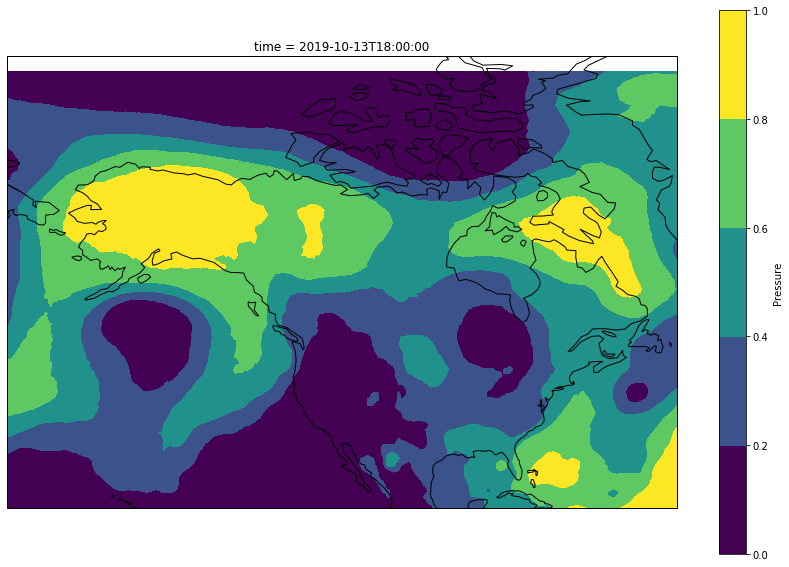

(array([4474., 3899., 3517., 3505., 3085., 3840., 3071., 2342., 2670.,
        1178.]),
 array([0.00158479, 0.09540412, 0.18922345, 0.28304279, 0.37686212,
        0.47068146, 0.56450079, 0.65832013, 0.75213946, 0.8459588 ,
        0.93977813]),
 <a list of 10 Patch objects>)

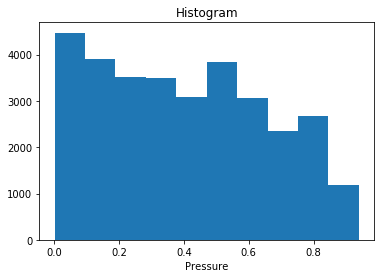

In [8]:
import cartopy.crs as ccrs
plt.figure(figsize=(15,10));
ax = plt.axes(projection=ccrs.Miller());

percentile.isel(time=-1).plot.contourf(ax=ax,transform=ccrs.PlateCarree())
ax.set_extent([-180,-50,20,70])
ax.coastlines();
plt.show()
plt.close('all')
percentile.isel(time=-1).plot.hist()

In [9]:
new_perc = percentile.where(np.logical_and(percentile >= percentile.isel(time=-1)-0.05,percentile <= percentile.isel(time=-1)+0.05),drop=True)

In [10]:
mc_std = xarr_interpolate(mc.generate(type='sprd',dask=True),gefs)

In [11]:
mc_std_da=mc_std[[n for n in mc_std][0]]

In [13]:
%%timeit
mc_std_da.values[np.isnan(new_perc[:-1])]

10 s ± 2.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
out=mc_std_da.values[np.isnan(new_perc[:-1])]

568.8198600424306

In [42]:
dropped=mc_std_da.where(~np.isnan(new_perc[:-1]),drop=True)

(array([ 7., 15., 10., 10.,  8.,  5.,  2.,  1.,  1.,  3.]),
 array([ 49.36079788,  85.56597176, 121.77114563, 157.9763195 ,
        194.18149338, 230.38666725, 266.59184113, 302.797015  ,
        339.00218887, 375.20736275, 411.41253662]),
 <a list of 10 Patch objects>)

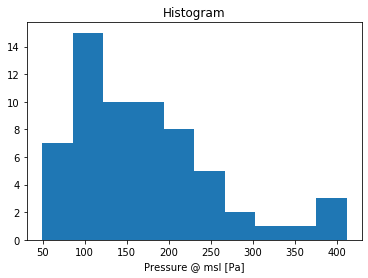

In [44]:
dropped.isel(lat=0,lon=0).plot.hist()

In [45]:
dropped

<xarray.DataArray 'Pressure' (time: 630, lat: 121, lon: 261)>
dask.array<where, shape=(630, 121, 261), dtype=float32, chunksize=(1, 121, 261), chunktype=numpy.ndarray>
Coordinates:
    fhour    timedelta64[ns] 1 days
  * time     (time) datetime64[ns] 2012-10-03 2012-10-03 ... 2012-10-23
  * lat      (lat) float64 80.0 79.5 79.0 78.5 78.0 ... 22.0 21.5 21.0 20.5 20.0
  * lon      (lon) float64 180.0 180.5 181.0 181.5 ... 308.5 309.0 309.5 310.0
Attributes:
    units:                                  Pa
    long_name:                              Pressure @ msl
    GRIB_param_discipline:                  Meteorological_products
    GRIB_param_category:                    Mass
    GRIB_param_name:                        Pressure
    GRIB_generating_process_type:           Forecast
    GRIB_param_id:                          [2 0 3 0]
    GRIB_product_definition_template:       0
    GRIB_product_definition_template_desc:  Analysis/forecast at horizontal l...
    GRIB_level_type:         

In [51]:
nfa_sprd = hsa.NewForecastArray('sprd', 'slp', 24)
gefs_sprd = nfa_sprd.load_forecast(subset_lat=lats,subset_lon=lons)

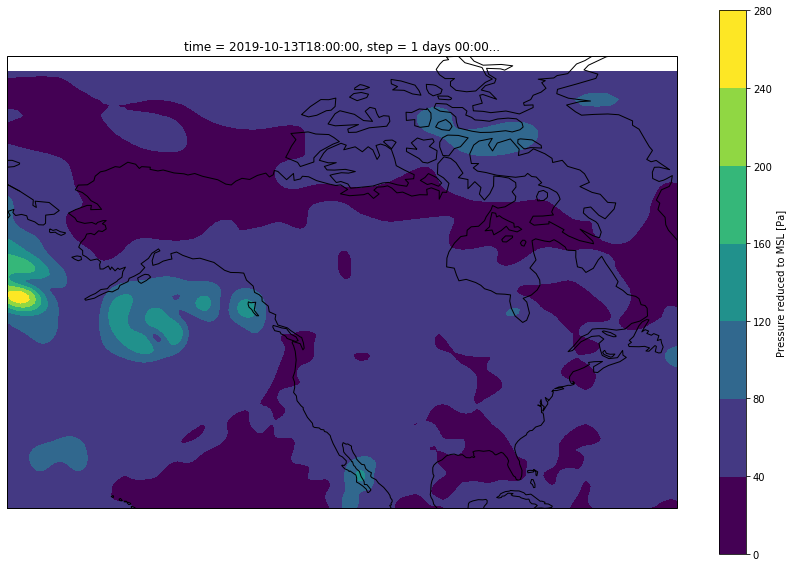

(array([4474., 3899., 3517., 3505., 3085., 3840., 3071., 2342., 2670.,
        1178.]),
 array([0.00158479, 0.09540412, 0.18922345, 0.28304279, 0.37686212,
        0.47068146, 0.56450079, 0.65832013, 0.75213946, 0.8459588 ,
        0.93977813]),
 <a list of 10 Patch objects>)

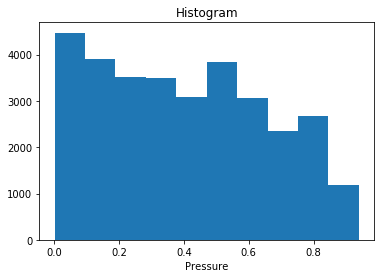

In [54]:
import cartopy.crs as ccrs
plt.figure(figsize=(15,10));
ax = plt.axes(projection=ccrs.Miller());

gefs_sprd['prmsl'].plot.contourf(ax=ax,transform=ccrs.PlateCarree())
ax.set_extent([-180,-50,20,70])
ax.coastlines();
plt.show()
plt.close('all')
percentile.isel(time=-1).plot.hist()

In [68]:
hsa_test = (gefs_sprd.rename({'prmsl':'Pressure','latitude':'lat','longitude':'lon'})-dropped.mean('time'))/dropped.std('time')

/home/taylorm/.conda/envs/espr/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [69]:
hsa_test

<xarray.Dataset>
Dimensions:     (lat: 121, lon: 261)
Coordinates:
    time        datetime64[ns] 2019-10-13T18:00:00
    step        timedelta64[ns] 1 days
    meanSea     int64 0
  * lat         (lat) float64 80.0 79.5 79.0 78.5 78.0 ... 21.5 21.0 20.5 20.0
  * lon         (lon) float64 180.0 180.5 181.0 181.5 ... 309.0 309.5 310.0
    valid_time  datetime64[ns] 2019-10-14T18:00:00
    fhour       timedelta64[ns] 1 days
Data variables:
    Pressure    (lat, lon) float32 dask.array<chunksize=(121, 261), meta=np.ndarray>

/home/taylorm/.conda/envs/espr/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


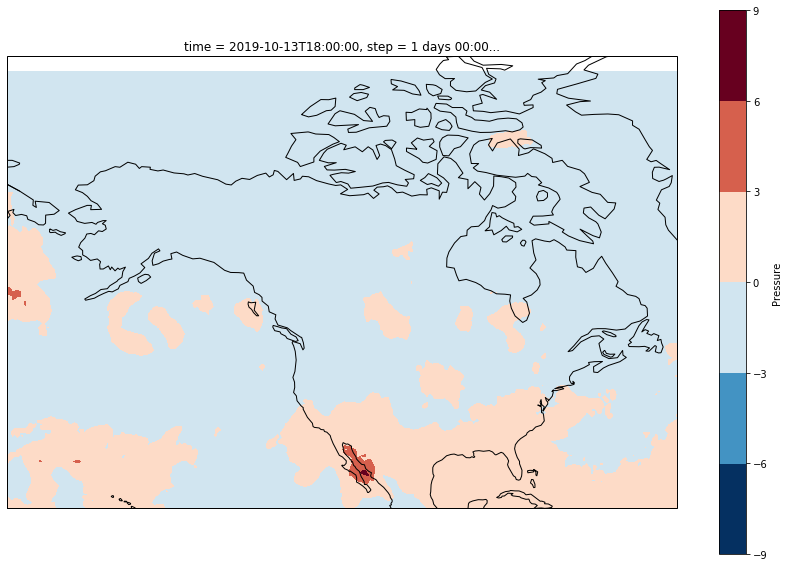

In [71]:
plt.figure(figsize=(15,10));
ax = plt.axes(projection=ccrs.Miller());

hsa_test['Pressure'].plot.contourf(ax=ax,transform=ccrs.PlateCarree())
ax.set_extent([-180,-50,20,70])
ax.coastlines();
plt.show()
plt.close('all')

In [75]:
hsa_test2=(0.99-(-0.99))*(hsa_test-hsa_test.min())/(hsa_test.max()-hsa_test.min()) + -0.99
hsa_test2 = np.arctanh(hsa_test2)

/home/taylorm/.conda/envs/espr/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


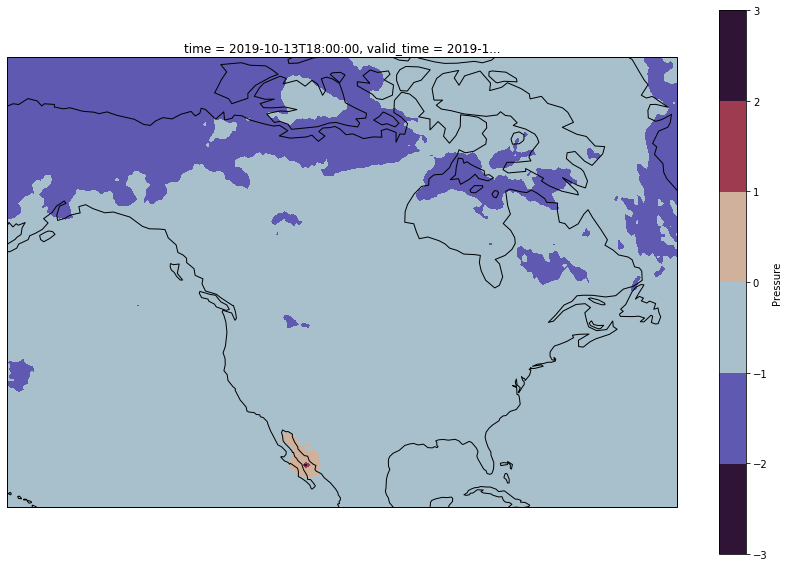

In [80]:
plt.figure(figsize=(15,10));
ax = plt.axes(projection=ccrs.Miller());

hsa_test2['Pressure'].plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cmap=plt.cm.twilight_shifted)
ax.set_extent([-160,-50,20,65])
ax.coastlines();
plt.show()
plt.close('all')